<a href="https://colab.research.google.com/github/A-R-M-028/Market-Basket-Analysis-Using-Apriori-Algorithm-/blob/main/D47__Apriori_Algorithm_(Market_Basket_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
# No library avl from sklearn of Apriori
!pip install apyori
from apyori import apriori

In [90]:
df = pd.read_csv("https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv")

# EDA: DE, DM, DC, DV

In [91]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [92]:
# Member_number -> Needed

In [93]:
df.tail()

,Member_number,Date,itemDescription
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice
38764,1521,26-12-2014,cat food


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [95]:
df.shape

(38765, 3)

In [96]:
df.ndim

2

In [97]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [98]:
# Find the number of items
df.itemDescription.nunique()

167

In [99]:
# Strength of each items
df.itemDescription.value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
rubbing alcohol             5
bags                        4
baby cosmetics              3
kitchen utensil             1
preservation products       1
Name: itemDescription, Length: 167, dtype: int64

In [100]:
# Top 10 most selling items
df.itemDescription.value_counts().nlargest(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itemDescription, dtype: int64

<Axes: >

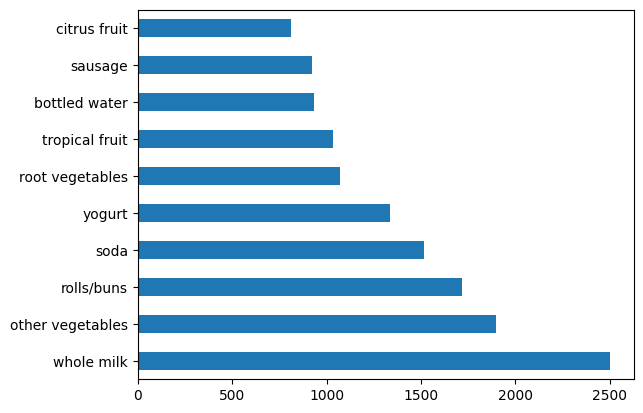

In [101]:
# Plot
df.itemDescription.value_counts().nlargest(10).plot(kind = 'barh')

In [102]:
# Show the 10 least selling items
df.itemDescription.value_counts().nsmallest(10)

kitchen utensil          1
preservation products    1
baby cosmetics           3
bags                     4
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
salad dressing           6
whisky                   8
Name: itemDescription, dtype: int64

<Axes: >

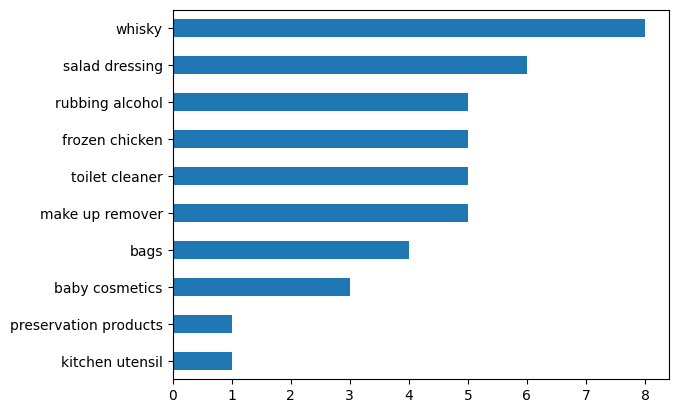

In [103]:
df.itemDescription.value_counts().nsmallest(10).plot(kind = 'barh')

In [104]:
# Show the top 10 Customer
df.Member_number.value_counts().nlargest(10)

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

In [105]:
# Total no. of customers
df.Member_number.nunique()

3898

## DM / DC

In [106]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [107]:
# 3 Separate columns -> Year, Month, Date from Date

In [108]:
df['Year'] = pd.DatetimeIndex(df['Date']).year

<ipython-input-108-b61d16208d4b>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Year'] = pd.DatetimeIndex(df['Date']).year


In [109]:
df['Month'] = pd.DatetimeIndex(df['Date']).month

<ipython-input-109-94de880cf203>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Month'] = pd.DatetimeIndex(df['Date']).month


In [110]:
df['Day'] = pd.DatetimeIndex(df['Date']).day

<ipython-input-110-04eb92d58cf1>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Day'] = pd.DatetimeIndex(df['Date']).day


In [111]:
df.head()

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1
2,2300,19-09-2015,pip fruit,2015,9,19
3,1187,12-12-2015,other vegetables,2015,12,12
4,3037,01-02-2015,whole milk,2015,1,2


In [112]:
# In which year majority of the transaction happened
df.Year.value_counts().nlargest(1)

2015    20488
Name: Year, dtype: int64

In [114]:
df.shape[0]

38765

In [121]:
(df.Year.value_counts().nlargest(1)/df.shape[0])*100

2015    52.851799
Name: Year, dtype: float64

In [124]:
# In which month most of the transaction has happened
df.Month.value_counts().nlargest(1) # Aug

8    3498
Name: Month, dtype: int64

In [144]:
# How many transactions has happened in the year of 2015 and month is Aug (Show all)
# 2015, 8
df[df['Year']==2015]['Month'].value_counts()

8     1963
1     1829
3     1792
6     1791
11    1777
5     1710
4     1666
10    1663
7     1645
9     1613
12    1554
2     1485
Name: Month, dtype: int64

In [154]:
# In what day in august 2015 has most of the transaction
df[df['Year'] == 2015][df['Month'] == 8]['Day'].value_counts()

<ipython-input-154-788036b78e55>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['Year'] == 2015][df['Month'] == 8]['Day'].value_counts()


8     92
20    83
21    83
15    82
18    82
28    79
7     75
13    74
12    73
9     69
5     69
24    68
6     66
11    65
4     64
27    61
23    61
19    60
3     59
17    57
30    55
14    54
26    54
22    53
25    52
31    47
2     47
16    46
1     45
10    45
29    43
Name: Day, dtype: int64

In [112]:
# Aug is he most transactionable month in this dataset

# Apriori Impementation

In [155]:
df.head(2)

,Member_number,Date,itemDescription,Year,Month,Day
0,1808,21-07-2015,tropical fruit,2015,7,21
1,2552,05-01-2015,whole milk,2015,5,1


In [157]:
data = df.copy()
data1 = data.copy()

In [161]:
# Pandas has 1 hot encoding or sk learn also
newData = pd.get_dummies(data['itemDescription'])

In [163]:
newData.head(5)

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [164]:
data1.drop('itemDescription', axis = 1, inplace = True)

In [165]:
data1.head()

,Member_number,Date,Year,Month,Day
0,1808,21-07-2015,2015,7,21
1,2552,05-01-2015,2015,5,1
2,2300,19-09-2015,2015,9,19
3,1187,12-12-2015,2015,12,12
4,3037,01-02-2015,2015,1,2


In [166]:
data1 = data1.join(newData)

In [167]:
data1.head()

,Member_number,Date,Year,Month,Day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,21-07-2015,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,05-01-2015,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,19-09-2015,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,12-12-2015,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,01-02-2015,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [168]:
products = df.itemDescription.unique()

In [177]:
products

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [169]:
data1.groupby(['Member_number', 'Date'])[products[:]].sum()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   
...                                  ...         ...        ...   
4999          24-01-2015               1           0          0   
              26-12-2015               0           0          0   
5000          09-03-2014               0           0          0   
              10-02-2015               0           0          0   
              16-11-2014               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   
...                                    ...         ...         ...   
4999          24-01-2015                 1           0           0   
              26-12-2015                 0           0           0   
5000          09-03-2014                 0           0           0   
              10-02-2015                 0           0           0   
              16-11-2014                 1           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          24-01-2015             0     0            0        0  ...   
              26-12-2015             0     0            0        0  ...   
5000          09-03-2014             0     0            0        0  ...   
              10-02-2015             0     0            0        0  ...   
              16-11-2014             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          24-01-2015               0     0    0               0   
              26-12-2015               0     0    0               0   
5000          09-03-2014               0     0    0               0   
              10-02-2015               0     0    0               0   
              16-11-2014               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015   

In [170]:
newItemsDf = data1.groupby(['Member_number', 'Date'])[products[:]].sum()

In [171]:
newItemsDf.head()

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          15-03-2015               0           1          0   
              24-06-2014               0           1          0   
              24-07-2015               0           0          0   
              25-11-2015               0           0          0   
              27-05-2015               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          15-03-2015                 0           0           0   
              24-06-2014                 0           0           0   
              24-07-2015                 0           0           0   
              25-11-2015                 0           0           0   
              27-05-2015                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          15-03-2015             0     0            0        0  ...   
              24-06-2014             0     0            0        0  ...   
              24-07-2015             0     0            0        0  ...   
              25-11-2015             0     0            0        0  ...   
              27-05-2015             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          15-03-2015               0     0    0               0   
              24-06-2014               0     0    0               0   
              24-07-2015               0     0    0               0   
              25-11-2015               0     0    0               0   
              27-05-2015               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          15-03-2015                     0               0            0   
              24-06-2014                     0               0            0   
              24-07-2015                     0               0            0   
              25-11-2015                     0               0            0   
              27-05-2015                     0               0            0   

                          make up remover  toilet cleaner  \
Member_number Date                                          
1000          15-03-2015                0               0   
              24-06-2014                0               0   
              24-07-2015                0               0   
              25-11-2015                0               0   
              27-05-2015                0               0   

                          preservation products  
Member_number Date                               
1000          15-03-2015                      0  
              24-06-2014                      0  
              24-07-2015                      0  
              25-11-2015                      0  
              27-05-2015                      0  

[5 rows x 167 columns]

In [173]:
newItemsDf = newItemsDf.reset_index()[products]

In [174]:
newItemsDf

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
def func(data):
  for i in products:
    if data[i] > 0:
      data[i] = i
  return data

In [176]:
newItemsDf = newItemsDf.apply(func, axis = 1)

In [179]:
newItemsDf.head()

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,whole milk,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [180]:
newItemsDf.values[0]

array([0, 'whole milk', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       'yogurt', 'sausage', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 'semi-finished bread', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0], dtype=object)

In [193]:
arr = []
for i in range(newItemsDf.shape[0]):
  item_name = []
  for j in (newItemsDf.loc[i]):
    if j != 0:
      item_name.append(j)
  arr.append(item_name)
  item_name = []
  # Range -> Indexing

In [194]:
arr[0]

['whole milk', 'yogurt', 'sausage', 'semi-finished bread']

In [191]:
print(newItemsDf.loc[0])

tropical fruit                    0
whole milk               whole milk
pip fruit                         0
other vegetables                  0
rolls/buns                        0
                            ...    
pudding powder                    0
ready soups                       0
make up remover                   0
toilet cleaner                    0
preservation products             0
Name: 0, Length: 167, dtype: object


In [188]:
print(newItemsDf.iloc[0, 1])

whole milk


# Train Model

In [205]:
association_model = apriori(arr,
                            min_support = 0.0001,
                            min_confidence = 0.10,
                            min_lift = 3,
                            max_length = 2
                            )
result_model = list(association_model)

In [206]:
result_model[1]

RelationRecord(items=frozenset({'ready soups', 'baking powder'}), support=0.00013366303548753594, ordered_statistics=[OrderedStatistic(items_base=frozenset({'ready soups'}), items_add=frozenset({'baking powder'}), confidence=0.13333333333333333, lift=16.48815426997245)])

In [196]:
association_model = apriori(arr)
result = list(association_model)

In [197]:
result

[RelationRecord(items=frozenset({'other vegetables'}), support=0.12210118291786407, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'other vegetables'}), confidence=0.12210118291786407, lift=1.0)]),
 RelationRecord(items=frozenset({'rolls/buns'}), support=0.11000467820624206, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'rolls/buns'}), confidence=0.11000467820624206, lift=1.0)]),
 RelationRecord(items=frozenset({'whole milk'}), support=0.15792287642852368, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'whole milk'}), confidence=0.15792287642852368, lift=1.0)])]